In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Configure visualizations
plt.rcParams['figure.figsize']=[15,6]

In [111]:
# Load and preprocess data

df = pd.read_csv('Infant_Health_Prediction/Synthetic-Infant-Health-Data.csv')
df.head()

,Unnamed: 0,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,...,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,...,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,...,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,...,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,...,Plethoric,PAIVS,no,0-3_days,no,None,Complete,Normal,Low,no
4,4,no,Equal,Moderate,Normal,Plethoric,no,yes,12+,5-12,...,Plethoric,PAIVS,no,0-3_days,yes,Lt_to_Rt,Complete,Normal,Normal,yes


In [54]:
# Dropping unecessary columns

df = df.drop('Unnamed: 0',axis=1)
df.head()

,BirthAsphyxia,HypDistrib,HypoxiaInO2,CO2,ChestXray,Grunting,LVHreport,LowerBodyO2,RUQO2,CO2Report,XrayReport,Disease,GruntingReport,Age,LVH,DuctFlow,CardiacMixing,LungParench,LungFlow,Sick
0,no,Equal,Severe,Normal,Normal,yes,no,5-12,<5,<7.5,Asy/Patchy,TGA,no,4-10_days,no,Lt_to_Rt,Transp.,Normal,Normal,no
1,no,Equal,Moderate,High,Grd_Glass,no,no,<5,5-12,>=7.5,Grd_Glass,Fallot,no,0-3_days,no,Rt_to_Lt,Mild,Abnormal,High,no
2,no,Equal,Severe,Normal,Plethoric,no,yes,5-12,5-12,>=7.5,Normal,PFC,no,0-3_days,no,Lt_to_Rt,Complete,Normal,High,no
3,no,Equal,Moderate,Normal,Plethoric,no,no,5-12,<5,<7.5,Plethoric,PAIVS,no,0-3_days,no,None,Complete,Normal,Low,no
4,no,Equal,Moderate,Normal,Plethoric,no,yes,12+,5-12,<7.5,Plethoric,PAIVS,no,0-3_days,yes,Lt_to_Rt,Complete,Normal,Normal,yes


In [55]:
df.shape

(15000, 20)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   BirthAsphyxia   15000 non-null  object
 1   HypDistrib      15000 non-null  object
 2   HypoxiaInO2     15000 non-null  object
 3   CO2             15000 non-null  object
 4   ChestXray       15000 non-null  object
 5   Grunting        15000 non-null  object
 6   LVHreport       15000 non-null  object
 7   LowerBodyO2     15000 non-null  object
 8   RUQO2           15000 non-null  object
 9   CO2Report       15000 non-null  object
 10  XrayReport      15000 non-null  object
 11  Disease         15000 non-null  object
 12  GruntingReport  15000 non-null  object
 13  Age             15000 non-null  object
 14  LVH             15000 non-null  object
 15  DuctFlow        15000 non-null  object
 16  CardiacMixing   15000 non-null  object
 17  LungParench     15000 non-null  object
 18  LungFl

In [57]:
df.nunique()

BirthAsphyxia     2
HypDistrib        2
HypoxiaInO2       3
CO2               3
ChestXray         5
Grunting          2
LVHreport         2
LowerBodyO2       3
RUQO2             3
CO2Report         2
XrayReport        5
Disease           6
GruntingReport    2
Age               3
LVH               2
DuctFlow          3
CardiacMixing     4
LungParench       3
LungFlow          3
Sick              2
dtype: int64

In [58]:
# Handle missing values

(df.isnull().sum()/df.shape[0])*100

BirthAsphyxia     0.0
HypDistrib        0.0
HypoxiaInO2       0.0
CO2               0.0
ChestXray         0.0
Grunting          0.0
LVHreport         0.0
LowerBodyO2       0.0
RUQO2             0.0
CO2Report         0.0
XrayReport        0.0
Disease           0.0
GruntingReport    0.0
Age               0.0
LVH               0.0
DuctFlow          0.0
CardiacMixing     0.0
LungParench       0.0
LungFlow          0.0
Sick              0.0
dtype: float64

In [59]:
df=df.dropna()
df.shape

(15000, 20)

In [60]:
len(df.columns)

20

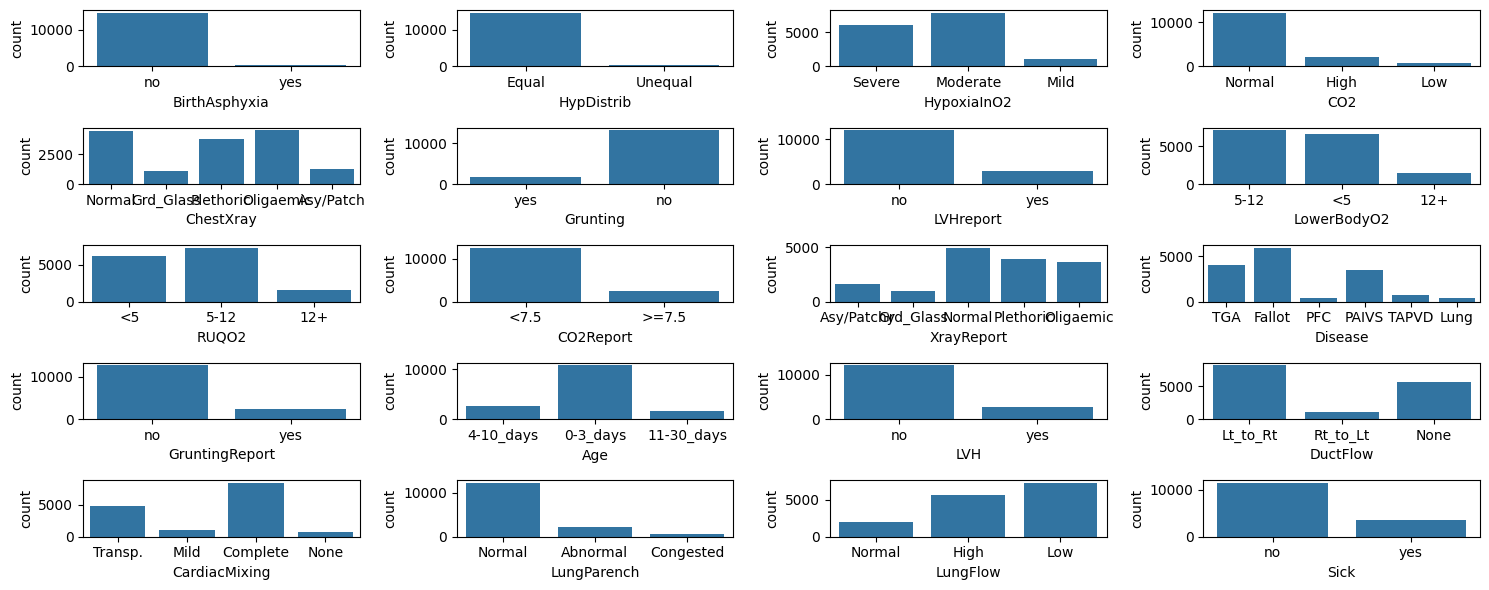

In [61]:
# Plot distributions of features

r=5
c=4
it=1
for i in df.columns:
    plt.subplot(r,c,it)
    sns.countplot(x=df[i])
    it+=1
plt.tight_layout()
plt.show()

In [62]:
import scipy.stats as stats

In [63]:
# Chi-squared test for feature selection

pvalue = []
for i in df.drop('Sick',axis=1).columns:
    stat,pval,dof,exp = stats.chi2_contingency(pd.crosstab(df[i],df['Sick']))
    pvalue.append(pval)

In [64]:
sig = pd.DataFrame(pvalue,index=df.drop('Sick',axis=1).columns,columns=['P-Value'])
sig.head()

,P-Value
BirthAsphyxia,8.222743e-01
HypDistrib,2.265954e-01
HypoxiaInO2,9.960833e-01
CO2,3.717060e-02
ChestXray,6.149512e-17


In [65]:
sig[sig['P-Value']<0.05].index

Index(['CO2', 'ChestXray', 'Grunting', 'CO2Report', 'XrayReport', 'Disease',
       'GruntingReport', 'Age', 'DuctFlow', 'CardiacMixing', 'LungParench',
       'LungFlow'],
      dtype='object')

In [66]:
# Feature encoding and transformation

x = df[['ChestXray', 'Grunting', 'XrayReport', 'Disease', 'GruntingReport','Age', 'DuctFlow', 'CardiacMixing', 'LungParench', 'LungFlow']]
y = df['Sick']


In [67]:
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,DuctFlow,CardiacMixing,LungParench,LungFlow
0,Normal,yes,Asy/Patchy,TGA,no,4-10_days,Lt_to_Rt,Transp.,Normal,Normal
1,Grd_Glass,no,Grd_Glass,Fallot,no,0-3_days,Rt_to_Lt,Mild,Abnormal,High
2,Plethoric,no,Normal,PFC,no,0-3_days,Lt_to_Rt,Complete,Normal,High
3,Plethoric,no,Plethoric,PAIVS,no,0-3_days,None,Complete,Normal,Low
4,Plethoric,no,Plethoric,PAIVS,no,0-3_days,Lt_to_Rt,Complete,Normal,Normal


In [68]:
# Convert categorical 'yes'/'no' to binary

for i in ['Grunting','GruntingReport']:
    x[i] = x[i].replace({'yes':1,'no':0})

In [69]:
# Display unique values and value counts for features

for i in x.drop(['Grunting','GruntingReport'],axis=1).columns:
    print("The unique values in {} are :{}".format(i,x[i].unique()))

The unique values in ChestXray are :['Normal' 'Grd_Glass' 'Plethoric' 'Oligaemic' 'Asy/Patch']
The unique values in XrayReport are :['Asy/Patchy' 'Grd_Glass' 'Normal' 'Plethoric' 'Oligaemic']
The unique values in Disease are :['TGA' 'Fallot' 'PFC' 'PAIVS' 'TAPVD' 'Lung']
The unique values in Age are :['4-10_days' '0-3_days' '11-30_days']
The unique values in DuctFlow are :['Lt_to_Rt' 'Rt_to_Lt' 'None']
The unique values in CardiacMixing are :['Transp.' 'Mild' 'Complete' 'None']
The unique values in LungParench are :['Normal' 'Abnormal' 'Congested']
The unique values in LungFlow are :['Normal' 'High' 'Low']


In [70]:
for i in x.drop(['Grunting','GruntingReport'],axis=1).columns:
    print("The value counts of {} are :\n{}".format(i,x[i].value_counts()))
    print("--"*50)

The value counts of ChestXray are :
Oligaemic    4497
Normal       4401
Plethoric    3757
Asy/Patch    1278
Grd_Glass    1067
Name: ChestXray, dtype: int64
----------------------------------------------------------------------------------------------------
The value counts of XrayReport are :
Normal        4925
Plethoric     3886
Oligaemic     3598
Asy/Patchy    1604
Grd_Glass      987
Name: XrayReport, dtype: int64
----------------------------------------------------------------------------------------------------
The value counts of Disease are :
Fallot    5936
TGA       4083
PAIVS     3457
TAPVD      741
Lung       434
PFC        349
Name: Disease, dtype: int64
----------------------------------------------------------------------------------------------------
The value counts of Age are :
0-3_days      10767
4-10_days      2669
11-30_days     1564
Name: Age, dtype: int64
----------------------------------------------------------------------------------------------------
The value c

In [71]:
# Create dummy variables for categorical features

x = pd.get_dummies(x,columns=['DuctFlow','CardiacMixing','LungParench'],drop_first=True)
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_None,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_None,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,Normal,1,Asy/Patchy,TGA,0,4-10_days,Normal,0,0,0,0,1,0,1
1,Grd_Glass,0,Grd_Glass,Fallot,0,0-3_days,High,0,1,1,0,0,0,0
2,Plethoric,0,Normal,PFC,0,0-3_days,High,0,0,0,0,0,0,1
3,Plethoric,0,Plethoric,PAIVS,0,0-3_days,Low,1,0,0,0,0,0,1
4,Plethoric,0,Plethoric,PAIVS,0,0-3_days,Normal,0,0,0,0,0,0,1


In [72]:
# Encode ordinal features

x['Age'] = x['Age'].replace({'0-3_days':0,'4-10_days':1,'11-30_days':2})
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_None,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_None,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,Normal,1,Asy/Patchy,TGA,0,1,Normal,0,0,0,0,1,0,1
1,Grd_Glass,0,Grd_Glass,Fallot,0,0,High,0,1,1,0,0,0,0
2,Plethoric,0,Normal,PFC,0,0,High,0,0,0,0,0,0,1
3,Plethoric,0,Plethoric,PAIVS,0,0,Low,1,0,0,0,0,0,1
4,Plethoric,0,Plethoric,PAIVS,0,0,Normal,0,0,0,0,0,0,1


In [73]:
x['LungFlow'] = x['LungFlow'].replace({'Normal':0,'Low':1,'High':2})
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_None,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_None,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,Normal,1,Asy/Patchy,TGA,0,1,0,0,0,0,0,1,0,1
1,Grd_Glass,0,Grd_Glass,Fallot,0,0,2,0,1,1,0,0,0,0
2,Plethoric,0,Normal,PFC,0,0,2,0,0,0,0,0,0,1
3,Plethoric,0,Plethoric,PAIVS,0,0,1,1,0,0,0,0,0,1
4,Plethoric,0,Plethoric,PAIVS,0,0,0,0,0,0,0,0,0,1


In [74]:
# Normalize features by their value counts

for i in ['ChestXray','XrayReport','Disease']:
    x[i] = x[i].map(x[i].value_counts(normalize=True))

In [75]:
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_None,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_None,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,0.293400,1,0.106933,0.272200,0,1,0,0,0,0,0,1,0,1
1,0.071133,0,0.065800,0.395733,0,0,2,0,1,1,0,0,0,0
2,0.250467,0,0.328333,0.023267,0,0,2,0,0,0,0,0,0,1
3,0.250467,0,0.259067,0.230467,0,0,1,1,0,0,0,0,0,1
4,0.250467,0,0.259067,0.230467,0,0,0,0,0,0,0,0,0,1


In [76]:
x.columns

Index(['ChestXray', 'Grunting', 'XrayReport', 'Disease', 'GruntingReport',
       'Age', 'LungFlow', 'DuctFlow_None', 'DuctFlow_Rt_to_Lt',
       'CardiacMixing_Mild', 'CardiacMixing_None', 'CardiacMixing_Transp.',
       'LungParench_Congested', 'LungParench_Normal'],
      dtype='object')

In [77]:
# Binary encoding for certain features

for i in ['DuctFlow_Rt_to_Lt', 'CardiacMixing_Mild','CardiacMixing_Transp.', 'LungParench_Congested', 'LungParench_Normal']:
    x[i] = x[i].replace({True:1,False:0})

In [78]:
x.head()

,ChestXray,Grunting,XrayReport,Disease,GruntingReport,Age,LungFlow,DuctFlow_None,DuctFlow_Rt_to_Lt,CardiacMixing_Mild,CardiacMixing_None,CardiacMixing_Transp.,LungParench_Congested,LungParench_Normal
0,0.293400,1,0.106933,0.272200,0,1,0,0,0,0,0,1,0,1
1,0.071133,0,0.065800,0.395733,0,0,2,0,1,1,0,0,0,0
2,0.250467,0,0.328333,0.023267,0,0,2,0,0,0,0,0,0,1
3,0.250467,0,0.259067,0.230467,0,0,1,1,0,0,0,0,0,1
4,0.250467,0,0.259067,0.230467,0,0,0,0,0,0,0,0,0,1


In [79]:
# Convert target variable to binary

y=y.replace({'no':0,'yes':1})
y

0        0
1        0
2        0
3        0
4        1
        ..
14995    0
14996    1
14997    1
14998    0
14999    0
Name: Sick, Length: 15000, dtype: int64

In [80]:
import statsmodels.api as sm

In [81]:
# Logistic regression model with feature selection

xc = sm.add_constant(x)
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.531825
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Sick   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14985
Method:                           MLE   Df Model:                           14
Date:                Thu, 18 Jul 2024   Pseudo R-squ.:                 0.03032
Time:                        13:28:33   Log-Likelihood:                -7977.4
converged:                       True   LL-Null:                       -8226.8
Covariance Type:            nonrobust   LLR p-value:                 1.632e-97
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.5599      0.106     -5.275      0.000      -0.768      -0.

In [82]:
# Iterative feature selection based on p-values

xc=sm.add_constant(x)
cols=list(xc.columns)
while len(cols)>1:
    xc=xc[cols]
    model=sm.Logit(y,xc).fit()
    p=model.pvalues
    pmax=max(p)
    pid=p.idxmax()           
    if pmax>0.05:
        cols.remove(pid)
        print(pid,pmax)
    else:
        break
cols

Optimization terminated successfully.
         Current function value: 0.531825
         Iterations 6
CardiacMixing_Transp. 0.7400712265169774
Optimization terminated successfully.
         Current function value: 0.531829
         Iterations 6
CardiacMixing_Mild 0.6981650590209726
Optimization terminated successfully.
         Current function value: 0.531834
         Iterations 6
XrayReport 0.6699694166850312
Optimization terminated successfully.
         Current function value: 0.531840
         Iterations 6
CardiacMixing_None 0.6526376403161271
Optimization terminated successfully.
         Current function value: 0.531846
         Iterations 6
GruntingReport 0.5809597603920291
Optimization terminated successfully.
         Current function value: 0.531857
         Iterations 6
LungParench_Congested 0.5544253253131592
Optimization terminated successfully.
         Current function value: 0.531868
         Iterations 6
LungFlow 0.38021762056660624
Optimization terminated successfull

['const',
 'ChestXray',
 'Grunting',
 'Disease',
 'Age',
 'DuctFlow_None',
 'DuctFlow_Rt_to_Lt',
 'LungParench_Normal']

In [83]:
# Final logistic regression model with selected features

xc = xc[['const','ChestXray','Grunting','Disease','Age','DuctFlow_Rt_to_Lt','LungParench_Normal']]
model = sm.Logit(y,xc).fit()
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.532626
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                   Sick   No. Observations:                15000
Model:                          Logit   Df Residuals:                    14993
Method:                           MLE   Df Model:                            6
Date:                Thu, 18 Jul 2024   Pseudo R-squ.:                 0.02886
Time:                        13:28:33   Log-Likelihood:                -7989.4
converged:                       True   LL-Null:                       -8226.8
Covariance Type:            nonrobust   LLR p-value:                 2.239e-99
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -0.3772      0.086     -4.399      0.000      -0.545      -0.209
Chest

### Building other models

In [86]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,roc_auc_score,roc_curve

In [87]:
# Train-test split

xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.30,random_state=42)

In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [89]:
# Initialize and evaluate different models

lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
knn=KNeighborsClassifier()
gnb=GaussianNB()

In [90]:
# Model training and evaluation function

def predictor(model_name):    
    print("For the {}".format(model_name))    
    model_name.fit(xtrain,ytrain)    
    y_pred_train = model_name.predict(xtrain)    
    y_pred_test = model_name.predict(xtest)    
    print("The TRAIN accuracy is",accuracy_score(ytrain,y_pred_train))    
    print("The ROC score for TRAIN data is",roc_auc_score(ytrain,y_pred_train))    
    fpr,tpr,thresholds = roc_curve(ytrain,model_name.predict_proba(xtrain)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()    
    print("--"*50)    
    print("The TEST accuracy is",accuracy_score(ytest,y_pred_test))    
    print("The ROC score for TEST data is",roc_auc_score(ytest,y_pred_test))    
    fpr,tpr,thresholds = roc_curve(ytest,model_name.predict_proba(xtest)[:,1])    
    plt.plot(fpr,tpr)    
    plt.plot([0,1],[0,1])    
    plt.grid()    
    plt.show()

### **Logistic Regression**

For the LogisticRegression()
The TRAIN accuracy is 0.7602857142857142
The ROC score for TRAIN data is 0.5031470203002033


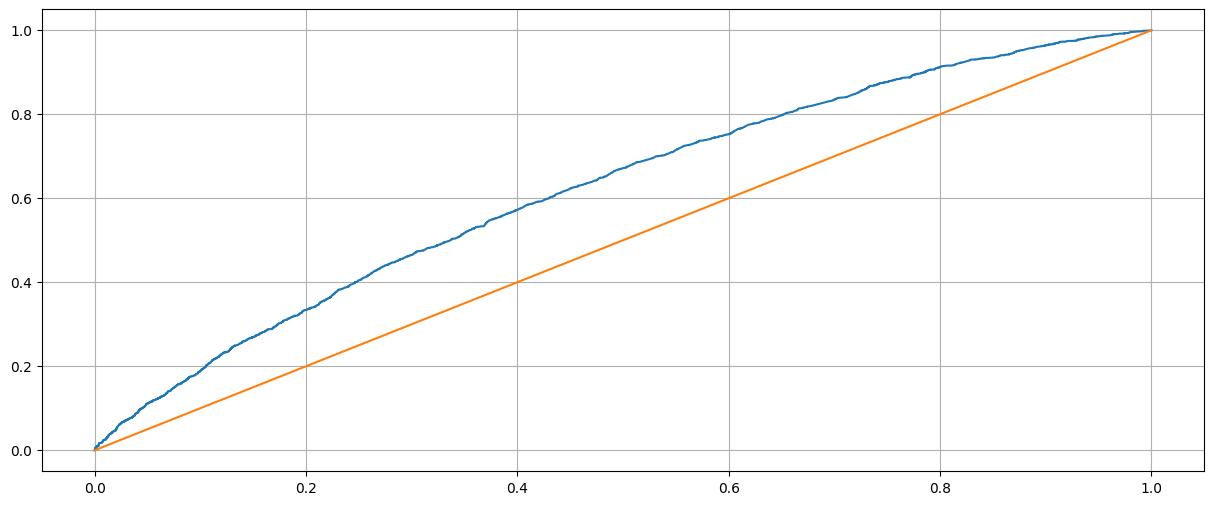

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7673333333333333
The ROC score for TEST data is 0.5006180555478466


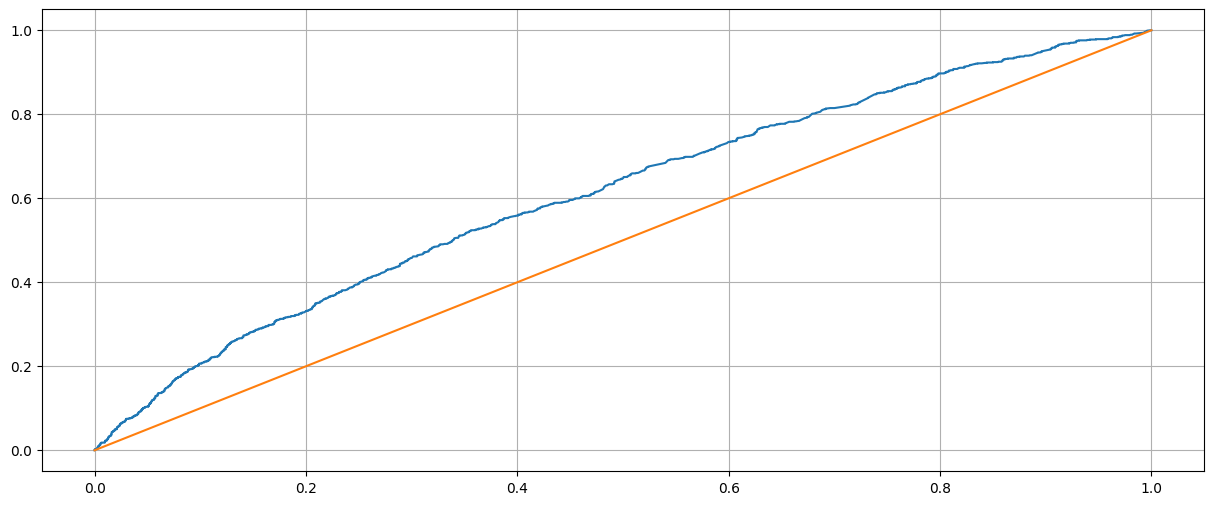

In [91]:
predictor(lr)

### **Decision Tree**

For the DecisionTreeClassifier()
The TRAIN accuracy is 0.8676190476190476
The ROC score for TRAIN data is 0.733986726423327


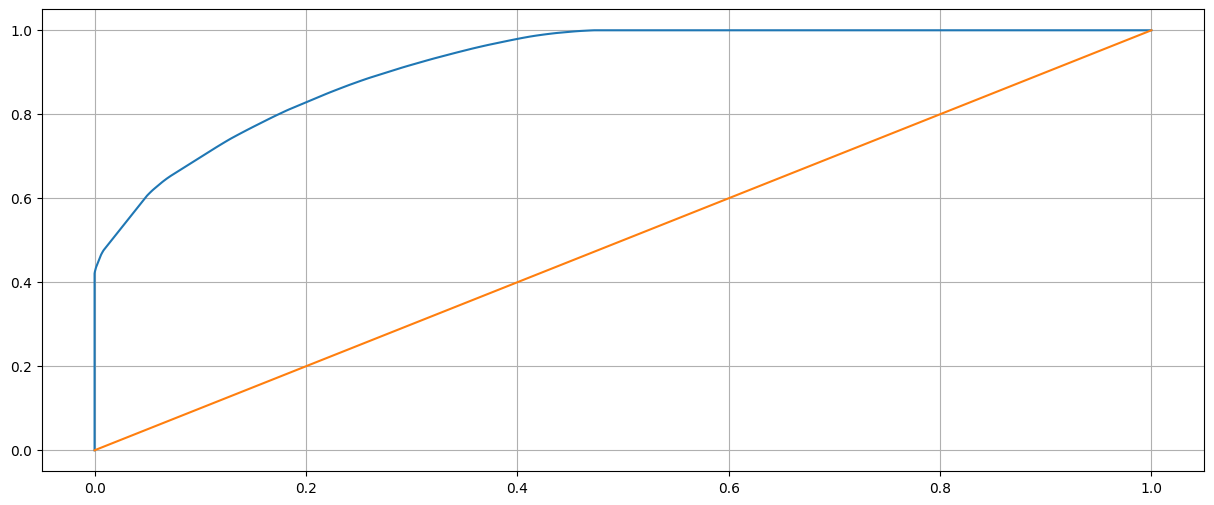

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7175555555555555
The ROC score for TEST data is 0.539973790226341


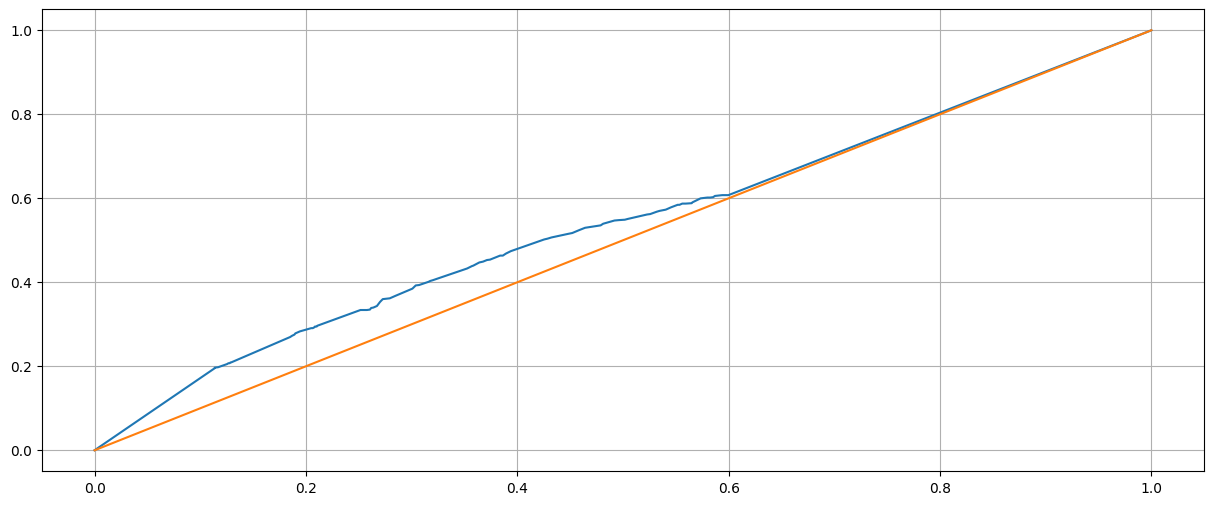

In [92]:
predictor(dt)

### **RandomForest**

For the RandomForestClassifier()
The TRAIN accuracy is 0.8675238095238095
The ROC score for TRAIN data is 0.7466525964581541


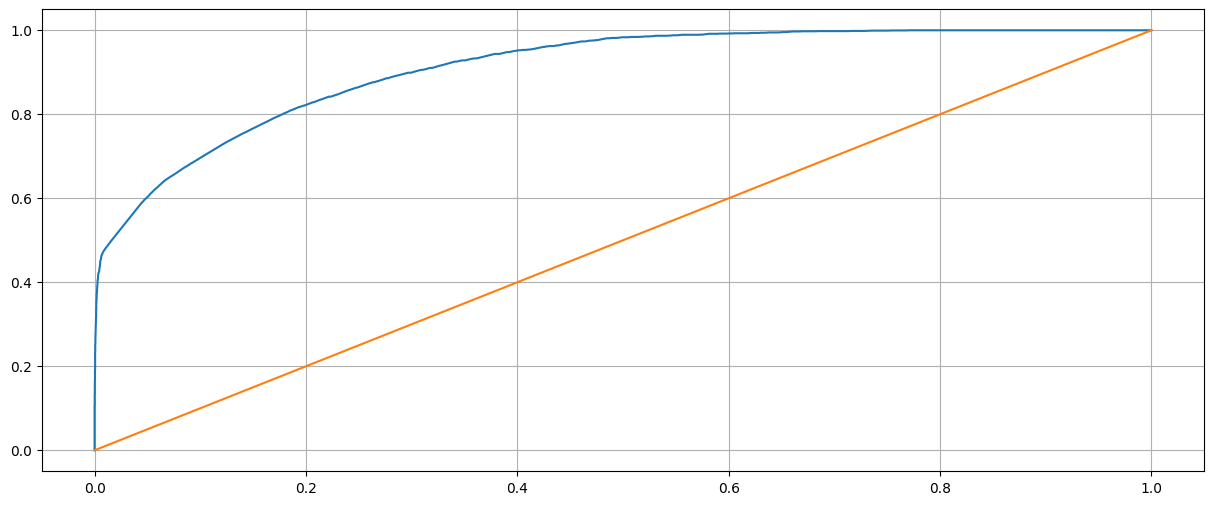

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7286666666666667
The ROC score for TEST data is 0.5257471339651357


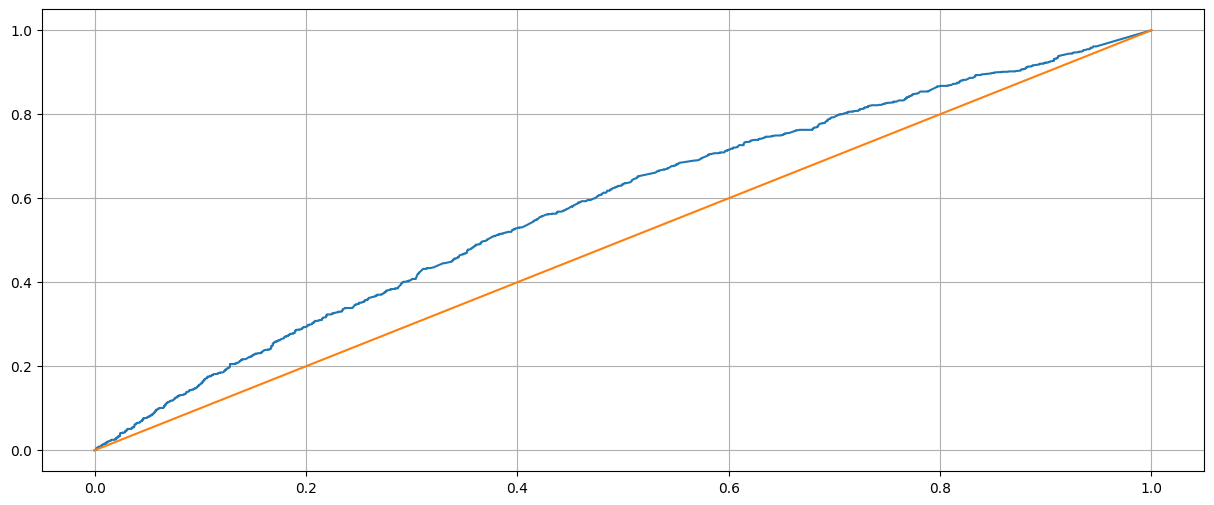

In [93]:
predictor(rf)

### **K Neighbors**

For the KNeighborsClassifier()
The TRAIN accuracy is 0.7774285714285715
The ROC score for TRAIN data is 0.6008225746971501


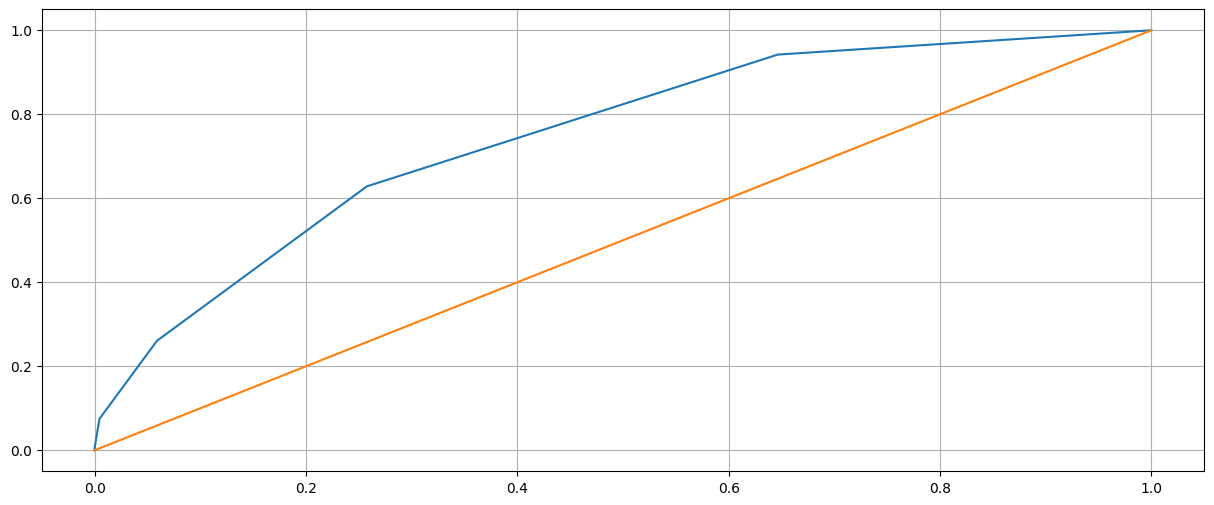

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7286666666666667
The ROC score for TEST data is 0.5254118797658549


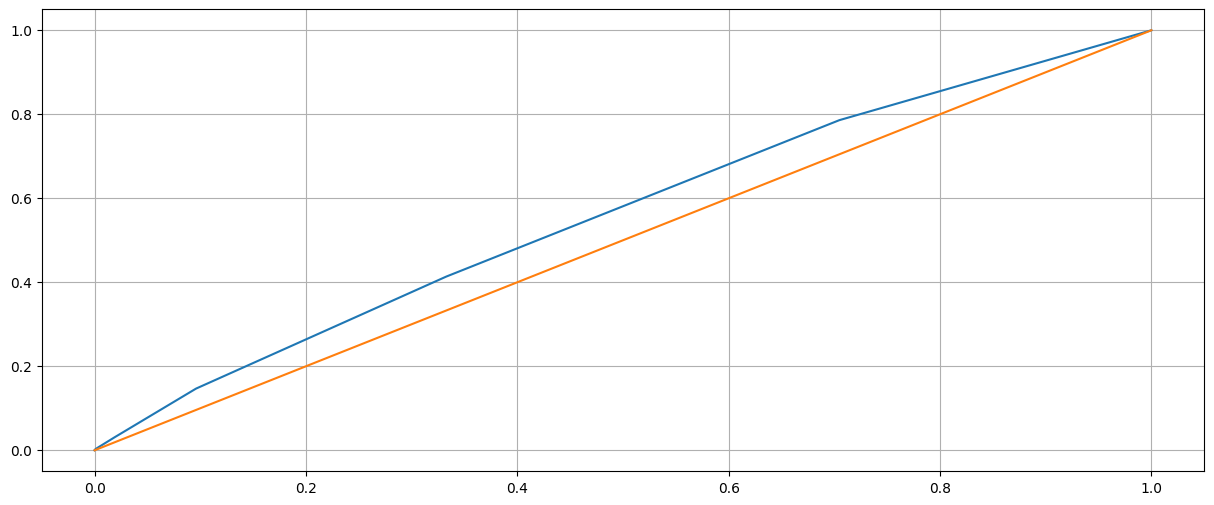

In [94]:
predictor(knn)

### **Gaussian Naive-Bayes**

For the GaussianNB()
The TRAIN accuracy is 0.6917142857142857
The ROC score for TRAIN data is 0.5517154673211393


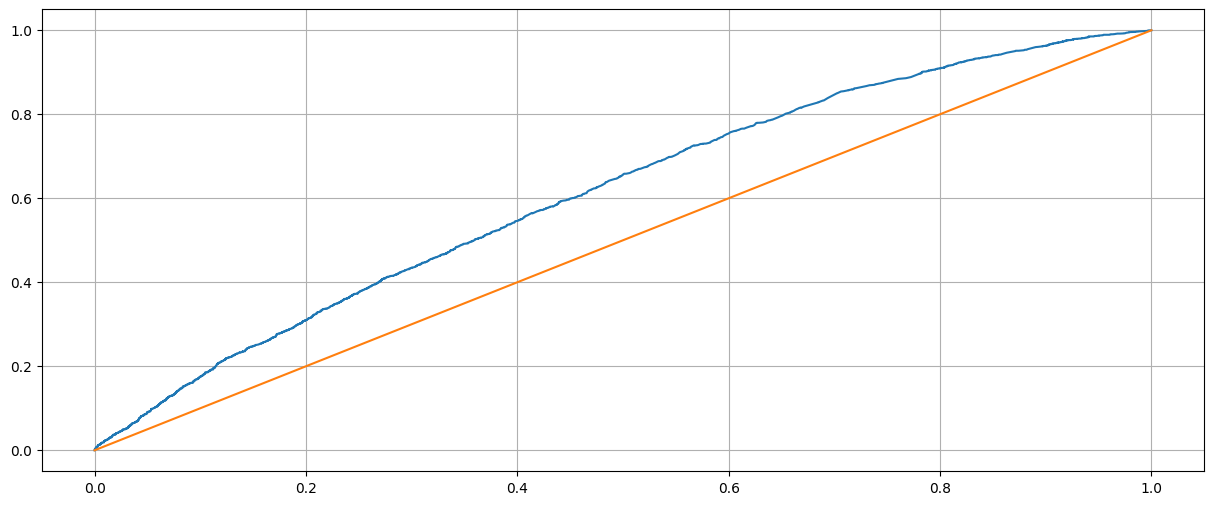

----------------------------------------------------------------------------------------------------
The TEST accuracy is 0.7017777777777777
The ROC score for TEST data is 0.5525050260377061


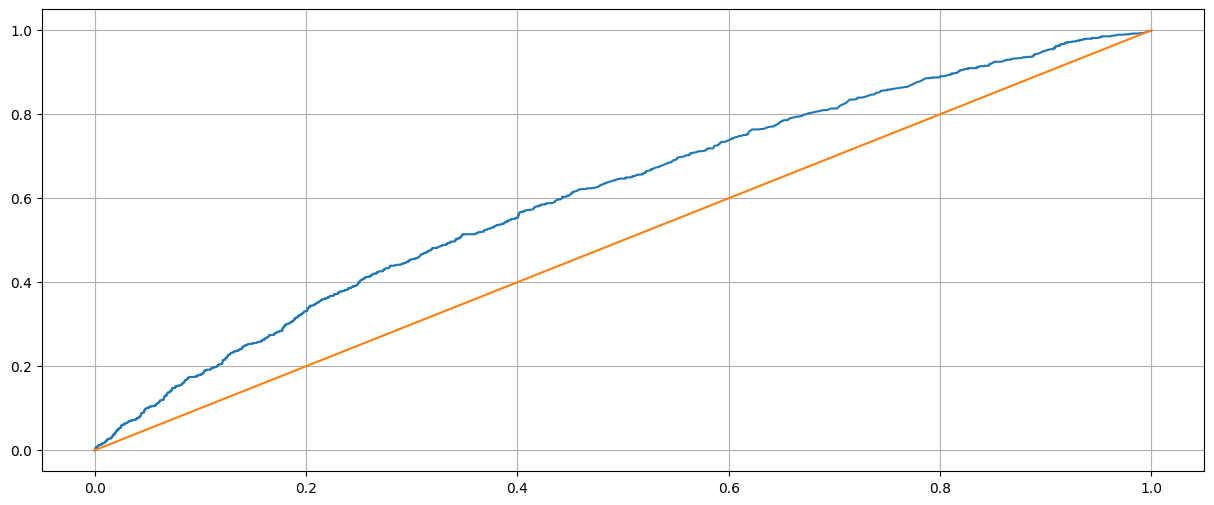

In [95]:
predictor(gnb)

### **Boosting**

In [96]:
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [97]:
estimators = [lr,dt,rf,gnb]
print(estimators)

[LogisticRegression(), DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB()]


### **AdaBoostClassfier**

In [98]:
train_score=[]
test_score=[]
for i in estimators:
    ada=AdaBoostClassifier(estimator=i,n_estimators=150,learning_rate=1.0)
    ada_model=ada.fit(xtrain,ytrain)
    y_pred_train = ada_model.predict(xtrain)    
    y_pred_test = ada_model.predict(xtest)
    train_score.append(accuracy_score(ytrain,y_pred_train))
    test_score.append(accuracy_score(ytest,y_pred_test))
    
    

In [99]:
score_df = pd.DataFrame({'model':['lr','dt','rf','gnb'],'train score':train_score,'test score':test_score})
score_df

,model,train score,test score
0,lr,0.759810,0.768444
1,dt,0.867619,0.713333
2,rf,0.867619,0.732667
3,gnb,0.661905,0.682222


### **GradientBoostingClassifier**

In [100]:
train_score=[]
test_score=[]

gbm = GradientBoostingClassifier(n_estimators=100,learning_rate=1.0,min_samples_split=2, max_depth=3, random_state=42, max_features='sqrt')
gbm_model=gbm.fit(xtrain,ytrain)
y_pred_train = gbm_model.predict(xtrain)    
y_pred_test = gbm_model.predict(xtest)
train_score.append(accuracy_score(ytrain,y_pred_train))
test_score.append(accuracy_score(ytest,y_pred_test))

In [101]:
train_score

[0.7702857142857142]

In [102]:
test_score

[0.7584444444444445]

### **XGBoost**

In [103]:
import xgboost as xgb


In [104]:
xgb_model = xgb.XGBClassifier(learning_rate=0.2,n_estimators=100,max_depth=3,max_leaves=12)

In [105]:
xgb_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=12,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [106]:
y_pred_train = xgb_model.predict(xtrain)    
y_pred_test = xgb_model.predict(xtest)

In [107]:
accuracy_score(ytrain,y_pred_train),accuracy_score(ytest,y_pred_test)

(0.7653333333333333, 0.7666666666666667)

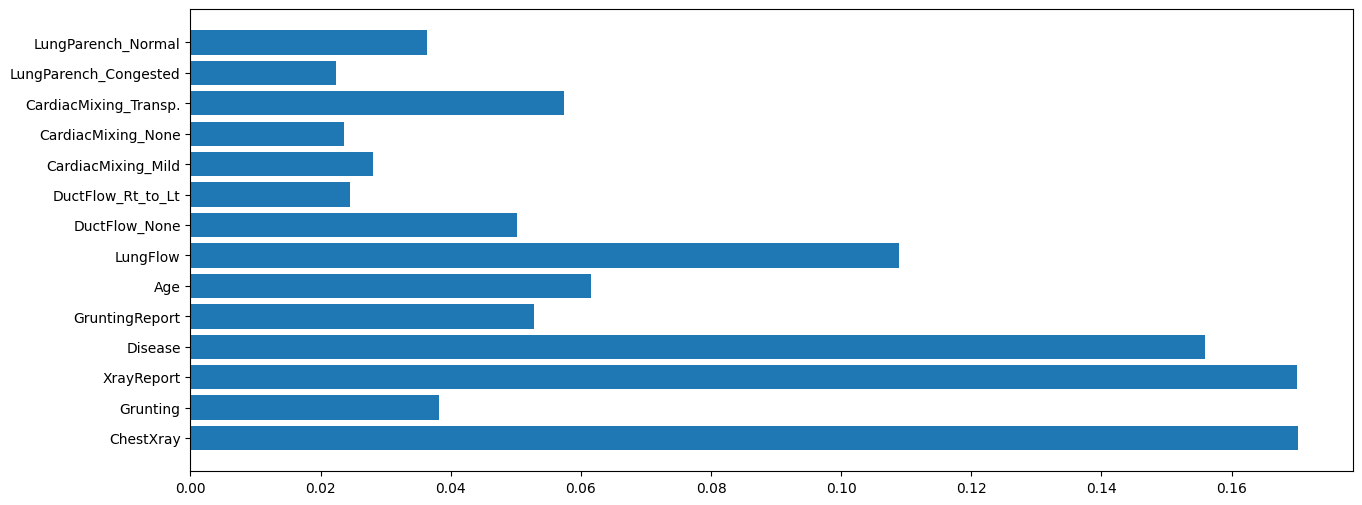

In [109]:
# Feature importances
plt.barh(xtrain.columns,rf.fit(xtrain,ytrain).feature_importances_)
plt.show()